In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [18]:
df = pd.read_csv('./datasets/diabetes.csv')
print(df.shape)
df.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


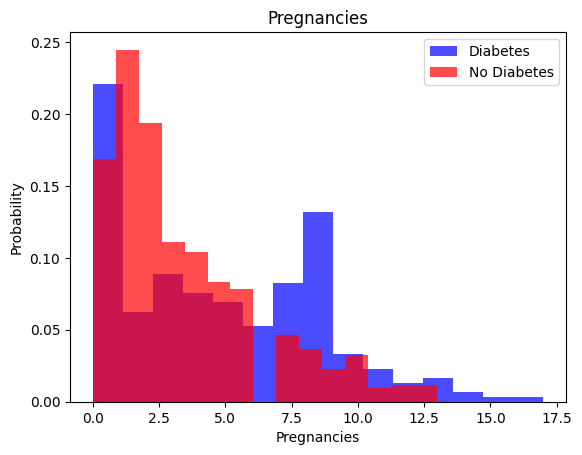

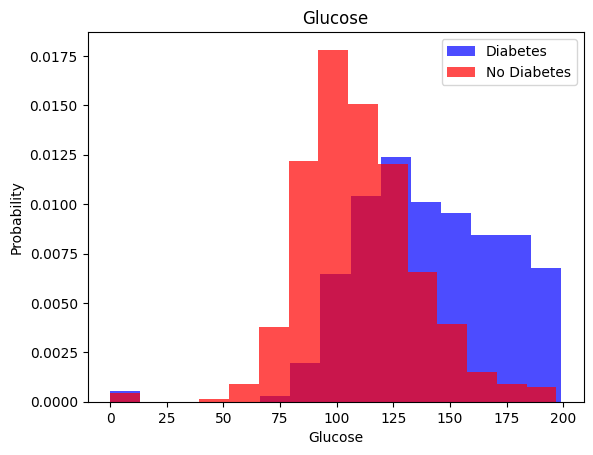

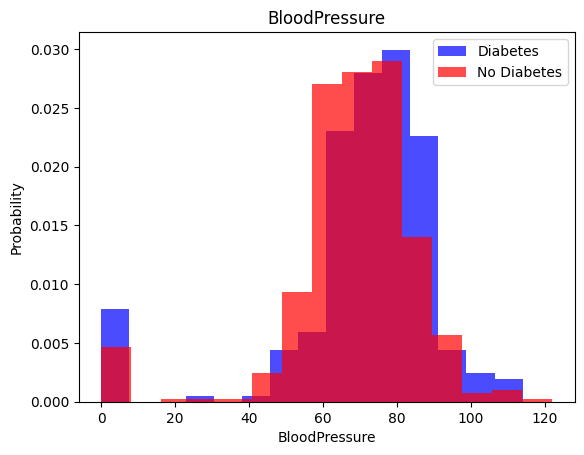

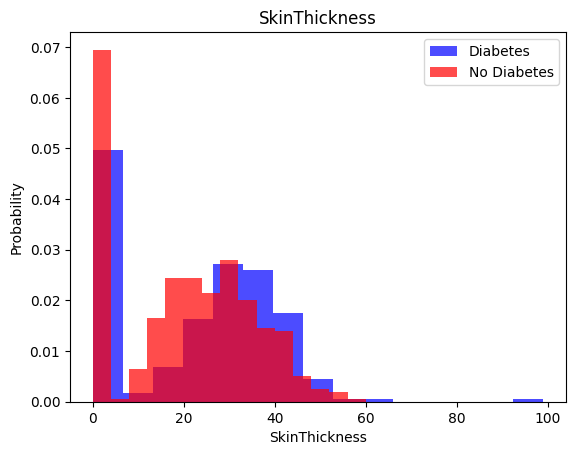

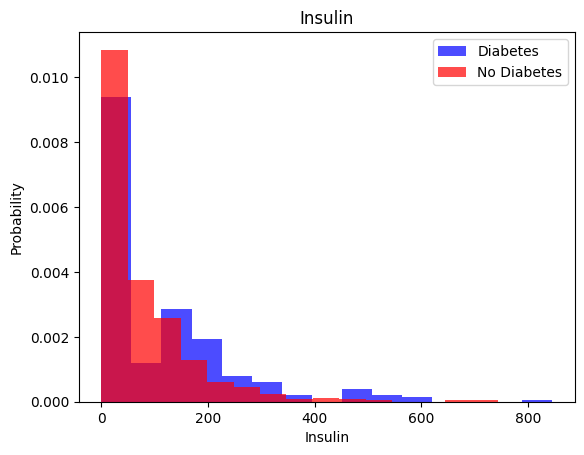

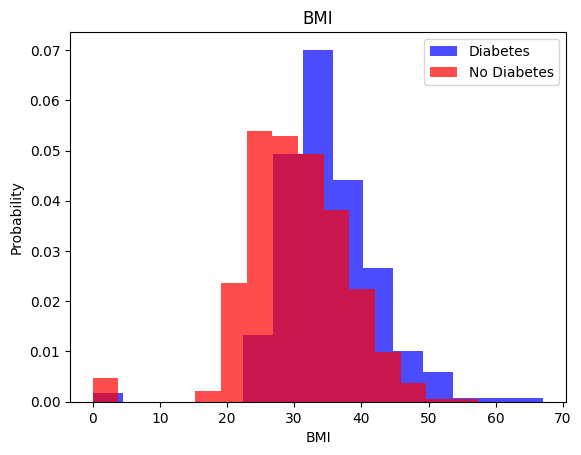

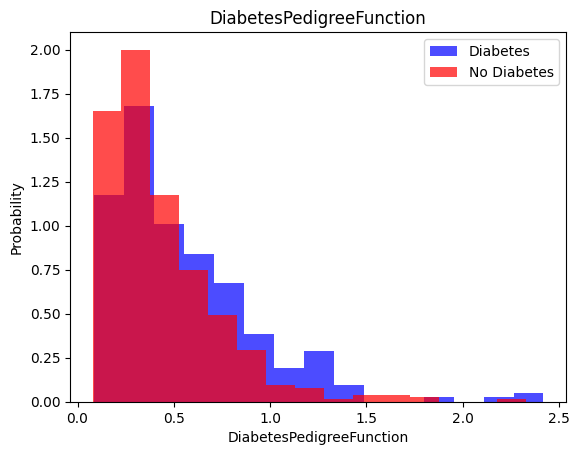

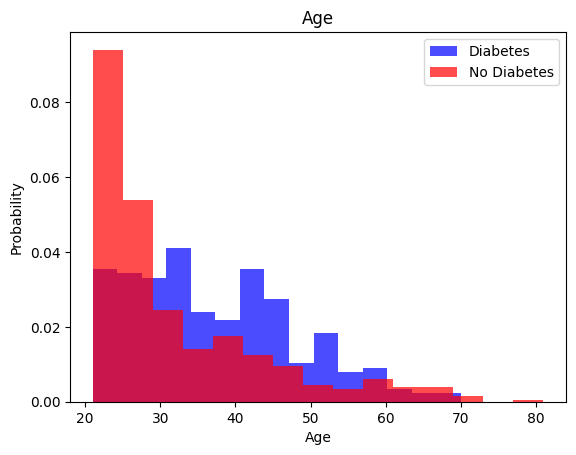

In [19]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(
        df[df['Outcome'] == 1][label],
        color='blue',
        label='Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.hist(
        df[df['Outcome'] == 0][label],
        color='red',
        label='No Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [20]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

over_sampler = RandomOverSampler()
X, y = over_sampler.fit_resample(X, y)

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss= tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy',],
    # metrics=[accuracy_score, confusion_matrix]
)

model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=[X_valid, y_valid]
)

Epoch 1/20
38/38 [==============================] - 3s 15ms/step - loss: 0.5922 - accuracy: 0.6917 - val_loss: 0.4931 - val_accuracy: 0.7450
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5176 - accuracy: 0.7433 - val_loss: 0.4597 - val_accuracy: 0.7450
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5043 - accuracy: 0.7383 - val_loss: 0.4592 - val_accuracy: 0.7350
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.4856 - accuracy: 0.7567 - val_loss: 0.4473 - val_accuracy: 0.7800
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.7583 - val_loss: 0.4467 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.7700 - val_loss: 0.4397 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.7567 - val_loss: 0.4370 - val_accuracy: 0.7650
Epoch 8/20
38/38 [=

In [25]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7700


[0.4978357255458832, 0.7699999809265137]